<a href="https://colab.research.google.com/github/NadeefChowdhury/Tensorflow_5_cat_dog/blob/main/Tensorflow_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [5]:
!kaggle datasets download -d dhirensk/cats-vs-dogs-training8000test2000

100% 434M/436M [00:03<00:00, 140MB/s]
100% 436M/436M [00:03<00:00, 119MB/s]


In [6]:
zip_ref = zipfile.ZipFile('catdog.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()

In [7]:
os.listdir('/content/dataset')

['training_set', 'single_prediction', 'dataset', 'test_set']

In [8]:
len(os.listdir('/content/dataset/training_set/cats'))

4000

In [9]:
len(os.listdir('/content/dataset/training_set/dogs'))

4000

In [10]:
import numpy as np
import os

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [11]:
from matplotlib.image import imread

In [12]:
train_path = '/content/dataset/training_set'
test_path = '/content/dataset/test_set'

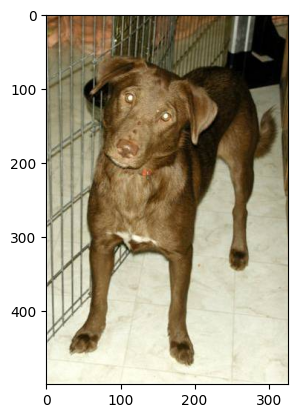

In [13]:
plt.imshow(imread(train_path + '/dogs/dog.1.jpg'))

In [14]:
imread(train_path + '/dogs/dog.1.jpg').shape

(499, 327, 3)

In [15]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/dogs'):

  if image_filename[-3:] == 'jpg':
    img = imread(train_path+'/dogs'+'/'+image_filename)
    d1, d2 = img.shape[:2]
    dim1.append(d1)
    dim2.append(d2)

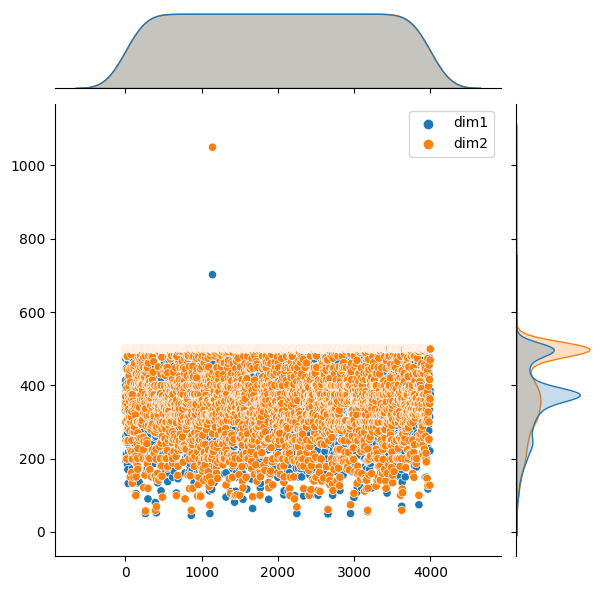

In [16]:
sns.jointplot(data={'dim1': np.array(dim1), 'dim2': np.array(dim2)})

In [17]:
np.mean(dim1)

364.84475

In [18]:
np.mean(dim2)

397.98225

In [19]:
image_shape = (365,398,3)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen = ImageDataGenerator(rescale=1/255,rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,shear_range=0.1,horizontal_flip=True,fill_mode='nearest')

In [22]:
image_gen.flow_from_directory(train_path)

Found 8000 images belonging to 2 classes.


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [24]:
model = Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3), input_shape=(image_shape), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 363, 396, 256)     7168      
                                                                 
 batch_normalization (Batch  (None, 363, 396, 256)     1024      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 181, 198, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 179, 196, 256)     590080    
                                                                 
 batch_normalization_1 (Bat  (None, 179, 196, 256)     1024      
 chNormalization)                                                
                                                        

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size=16

In [26]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=16, class_mode='binary')
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=16, class_mode='binary', shuffle=False)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [27]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [59]:
results = model.fit_generator(train_image_gen, epochs=10, validation_data=test_image_gen,
          callbacks=[early_stop])

<ipython-input-59-f5eade9c86ff>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=10, validation_data=test_image_gen,


Epoch 1/10
500/500 [==============================] - 509s 1s/step - loss: 0.3781 - accuracy: 0.8372 - val_loss: 0.5060 - val_accuracy: 0.7535
Epoch 2/10
500/500 [==============================] - 503s 1s/step - loss: 0.3393 - accuracy: 0.8584 - val_loss: 0.8143 - val_accuracy: 0.6030
Epoch 3/10
500/500 [==============================] - 500s 999ms/step - loss: 0.3148 - accuracy: 0.8723 - val_loss: 0.3793 - val_accuracy: 0.8420
Epoch 4/10
500/500 [==============================] - 495s 989ms/step - loss: 0.2807 - accuracy: 0.8861 - val_loss: 4.0378 - val_accuracy: 0.5500
Epoch 5/10
500/500 [==============================] - 495s 989ms/step - loss: 0.2788 - accuracy: 0.8836 - val_loss: 0.4100 - val_accuracy: 0.8095


In [60]:
results.history

{'loss': [0.3781317174434662,
  0.3392603397369385,
  0.3148086667060852,
  0.280673086643219,
  0.27880579233169556],
 'accuracy': [0.8372499942779541,
  0.8583750128746033,
  0.8722500205039978,
  0.8861250281333923,
  0.8836249709129333],
 'val_loss': [0.5060151815414429,
  0.8143112659454346,
  0.3793247640132904,
  4.037800312042236,
  0.4100496768951416],
 'val_accuracy': [0.7534999847412109,
  0.6029999852180481,
  0.8420000076293945,
  0.550000011920929,
  0.809499979019165]}

In [61]:
from tensorflow.keras.preprocessing import image

In [62]:
arr = image.load_img('/content/dataset/single_prediction/cat_or_dog_1.jpg', target_size=image_shape)

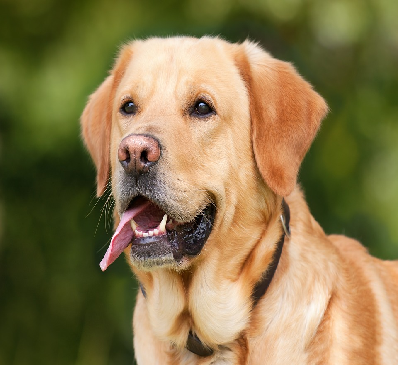

In [63]:
arr

In [64]:
arr2 = image.img_to_array(arr)

In [65]:
arr2.shape

(365, 398, 3)

In [66]:
arr2 = np.expand_dims(arr2, axis=0)

In [67]:
arr2.shape

(1, 365, 398, 3)

In [68]:
model.predict(arr2)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

In [105]:
arr3 = image.load_img('/content/dataset/single_prediction/cat_or_dog_2.jpg', target_size=image_shape)

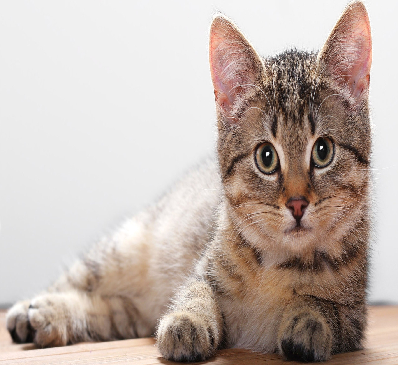

In [106]:
arr3

In [107]:
arr4 = image.img_to_array(arr3)

In [108]:
arr4 = np.expand_dims(arr4, axis=0)

In [109]:
arr4.shape

(1, 365, 398, 3)

In [110]:
(model.predict(arr4))

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [93]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [155]:
arr5 = image.load_img('/content/images.jpg', target_size=image_shape)

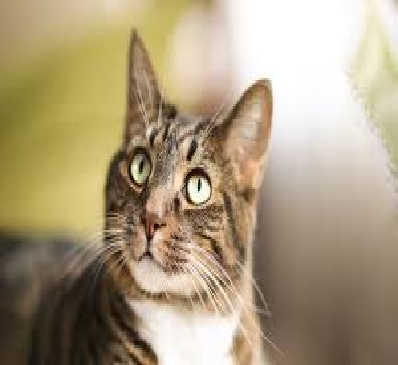

In [156]:
arr5

In [157]:
arr6 = image.img_to_array(arr5)

In [158]:
arr6 = np.expand_dims(arr6, axis=0)

In [159]:
arr6.shape

(1, 365, 398, 3)

In [162]:
(model.predict(arr6))

1/1 [==============================] - 0s 31ms/step


array([[0.99999976]], dtype=float32)